# Data Wrangling - Petfinder API

## Data Collection

Goal: Organize your data to streamline the next steps of your capstone

Time estimate: 1-2 hours 

■ Data loading

■ Data joining

In [268]:
# Import Libraries
import pandas as pd
import os
import petpy
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np

from library.sb_utils import save_file

In [276]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 2)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# Petfinder API

key = os.environ.get('PETFINDER_KEY')
secret = os.environ.get('PETFINDER_SECRET_KEY')

In [213]:
pf = petpy.Petfinder(key=key, secret=secret)

In [126]:
# petpy only accepts a string as the location, so to grab data for all cities in WA we need to loop through them
# cities_wa was built using the census API and then copied into this notebook

def import_petfinder_wa(after_date, before_date, animal_type):
#     cities_wa = {'Aberdeen', 'Anacortes', 'Arlington', 'Auburn', 'Bainbridge Island', 'Battle Ground', 'Bellevue', 'Bellingham', 'Benton City', 'Bonney Lake', 'Bothell', 'Bow', 'Bremerton', 'Burlington', 'Cashmere', 'Chehalis', 'Chewelah', 'Connell', 'Coupeville', 'Covington', 'Deer Park', 'Des Moines', 'East Wenatchee', 'Edgewood', 'Edmonds', 'Ellensburg', 'Elma', 'Ephrata', 'Everett', 'Federal Way', 'Ferndale', 'Friday Harbor', 'Gig Harbor', 'Graham', 'Issaquah', 'Kelso', 'Kennewick', 'Kent', 'Kirkland', 'Lacey', 'Lake Stevens', 'Lakewood', 'Langley', 'Leavenworth', 'Long Beach', 'Longview', 'Lynnwood', 'Maple Valley', 'McKenna', 'Moses Lake', 'Mount Vernon', 'Mountlake Terrace', 'Newport', 'Oak Harbor', 'Oakville', 'Ocean Shores', 'Okanogan', 'Olalla', 'Olympia', 'Onalaska', 'Othello', 'Pasco', 'Port Angeles', 'Port Orchard', 'Port Townsend', 'Prosser', 'Pullman', 'Puyallup', 'Quilcene', 'Quincy', 'Ravensdale', 'Raymond', 'Redmond', 'Renton', 'Republic', 'Richland', 'Roslyn', 'Roy', 'Sammamish', 'Seattle', 'Sequim', 'Shelton', 'Shoreline', 'Silvana', 'Silverdale', 'Snoqualmie', 'Spokane', 'Spokane Valley', 'Stanwood', 'Steilacoom', 'Sultan', 'Sumner', 'Tacoma', 'Tenino', 'Union Gap', 'University Place', 'Vancouver', 'Vashon Island', 'Walla Walla', 'Washougal', 'Wenatchee', 'West Richland', 'Winlock', 'Wishram', 'Woodinville', 'Yakima'}
    cities_wa = {'Aberdeen', 'Anacortes', 'Arlington', 'Auburn', 'Bainbridge Island', 'Battle Ground', 
                 'Bellevue', 'Bellingham', 'Benton City', 'Bonney Lake', 'Bothell', 'Bremerton', 'Burlington', 
                 'Cashmere', 'Chehalis', 'Chewelah', 'Connell', 'Coupeville', 'Covington', 'Deer Park', 
                 'Des Moines', 'East Wenatchee', 'Edgewood', 'Edmonds', 'Ellensburg', 'Elma', 'Ephrata', 
                 'Everett', 'Federal Way', 'Ferndale', 'Friday Harbor', 'Gig Harbor', 'Graham', 'Issaquah', 
                 'Kelso', 'Kennewick', 'Kent', 'Kirkland', 'Lacey', 'Lake Stevens', 'Lakewood', 'Langley', 
                 'Leavenworth', 'Long Beach', 'Longview', 'Lynnwood', 'Maple Valley', 'McKenna', 'Moses Lake', 
                 'Mount Vernon', 'Mountlake Terrace', 'Newport', 'Oak Harbor', 'Oakville', 'Ocean Shores', 
                 'Okanogan', 'Olympia', 'Onalaska', 'Othello', 'Pasco', 'Port Angeles', 'Port Orchard', 
                 'Port Townsend', 'Prosser', 'Pullman', 'Puyallup', 'Quilcene', 'Quincy', 'Ravensdale', 'Raymond', 
                 'Redmond', 'Renton', 'Republic', 'Richland', 'Roslyn', 'Roy', 'Sammamish', 'Seattle', 'Sequim', 
                 'Shelton', 'Shoreline', 'Silvana', 'Silverdale', 'Snoqualmie', 'Spokane', 'Spokane Valley', 
                 'Stanwood', 'Steilacoom', 'Sultan', 'Sumner', 'Tacoma', 'Tenino', 'Union Gap', 'University Place', 
                 'Vancouver', 'Vashon Island', 'Walla Walla', 'Washougal', 'Wenatchee', 'West Richland', 'Winlock', 
                 'Wishram', 'Woodinville', 'Yakima'}

    adopted_wa = pd.DataFrame()
    for city in cities_wa:
#         print(city)
        adopted = pf.animals(
            animal_type=animal_type, 
            status='adopted', 
            results_per_page=100, 
            pages=None, 
            location=city+', WA',
            distance=10,
            after_date=after_date, 
            before_date=before_date)
#         print(adopted)
        adopted_df = pd.DataFrame(adopted['animals'])
#         print(adopted_df.head())
        adopted_wa = adopted_wa.append(adopted_df)
#         print(adopted_wa.info()) 
       
    return adopted_wa

In [109]:
adopted_jan_dogs = import_petfinder_wa('2015-01-01', '2015-01-31', 'dog')

Ferndale
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      45 non-null     int64  
 1   organization_id         45 non-null     object 
 2   url                     45 non-null     object 
 3   type                    45 non-null     object 
 4   species                 45 non-null     object 
 5   breeds                  45 non-null     object 
 6   colors                  45 non-null     object 
 7   age                     45 non-null     object 
 8   gender                  45 non-null     object 
 9   size                    45 non-null     object 
 10  coat                    44 non-null     object 
 11  attributes              45 non-null     object 
 12  environment             45 non-null     object 
 13  tags                    45 non-null     object 
 14  name                    45 non-null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 48
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      106 non-null    int64  
 1   organization_id         106 non-null    object 
 2   url                     106 non-null    object 
 3   type                    106 non-null    object 
 4   species                 106 non-null    object 
 5   breeds                  106 non-null    object 
 6   colors                  106 non-null    object 
 7   age                     106 non-null    object 
 8   gender                  106 non-null    object 
 9   size                    106 non-null    object 
 10  coat                    98 non-null     object 
 11  attributes              106 non-null    object 
 12  environment             106 non-null    object 
 13  tags                    106 non-null    object 
 14  name                    106 non-null    obj

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 10
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      197 non-null    int64  
 1   organization_id         197 non-null    object 
 2   url                     197 non-null    object 
 3   type                    197 non-null    object 
 4   species                 197 non-null    object 
 5   breeds                  197 non-null    object 
 6   colors                  197 non-null    object 
 7   age                     197 non-null    object 
 8   gender                  197 non-null    object 
 9   size                    197 non-null    object 
 10  coat                    148 non-null    object 
 11  attributes              197 non-null    object 
 12  environment             197 non-null    object 
 13  tags                    197 non-null    object 
 14  name                    197 non-null    obj

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 0 to 17
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      330 non-null    int64  
 1   organization_id         330 non-null    object 
 2   url                     330 non-null    object 
 3   type                    330 non-null    object 
 4   species                 330 non-null    object 
 5   breeds                  330 non-null    object 
 6   colors                  330 non-null    object 
 7   age                     330 non-null    object 
 8   gender                  330 non-null    object 
 9   size                    330 non-null    object 
 10  coat                    184 non-null    object 
 11  attributes              330 non-null    object 
 12  environment             330 non-null    object 
 13  tags                    330 non-null    object 
 14  name                    330 non-null    obj

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 48
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      442 non-null    int64  
 1   organization_id         442 non-null    object 
 2   url                     442 non-null    object 
 3   type                    442 non-null    object 
 4   species                 442 non-null    object 
 5   breeds                  442 non-null    object 
 6   colors                  442 non-null    object 
 7   age                     442 non-null    object 
 8   gender                  442 non-null    object 
 9   size                    442 non-null    object 
 10  coat                    240 non-null    object 
 11  attributes              442 non-null    object 
 12  environment             442 non-null    object 
 13  tags                    442 non-null    object 
 14  name                    442 non-null    obj

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 10
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      490 non-null    int64  
 1   organization_id         490 non-null    object 
 2   url                     490 non-null    object 
 3   type                    490 non-null    object 
 4   species                 490 non-null    object 
 5   breeds                  490 non-null    object 
 6   colors                  490 non-null    object 
 7   age                     490 non-null    object 
 8   gender                  490 non-null    object 
 9   size                    490 non-null    object 
 10  coat                    273 non-null    object 
 11  attributes              490 non-null    object 
 12  environment             490 non-null    object 
 13  tags                    490 non-null    object 
 14  name                    490 non-null    obj

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 8
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      700 non-null    int64  
 1   organization_id         700 non-null    object 
 2   url                     700 non-null    object 
 3   type                    700 non-null    object 
 4   species                 700 non-null    object 
 5   breeds                  700 non-null    object 
 6   colors                  700 non-null    object 
 7   age                     700 non-null    object 
 8   gender                  700 non-null    object 
 9   size                    700 non-null    object 
 10  coat                    384 non-null    object 
 11  attributes              700 non-null    object 
 12  environment             700 non-null    object 
 13  tags                    700 non-null    object 
 14  name                    700 non-null    obje

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893 entries, 0 to 3
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      893 non-null    int64  
 1   organization_id         893 non-null    object 
 2   url                     893 non-null    object 
 3   type                    893 non-null    object 
 4   species                 893 non-null    object 
 5   breeds                  893 non-null    object 
 6   colors                  893 non-null    object 
 7   age                     893 non-null    object 
 8   gender                  893 non-null    object 
 9   size                    893 non-null    object 
 10  coat                    500 non-null    object 
 11  attributes              893 non-null    object 
 12  environment             893 non-null    object 
 13  tags                    893 non-null    object 
 14  name                    893 non-null    obje

<class 'pandas.core.frame.DataFrame'>
Int64Index: 908 entries, 0 to 14
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      908 non-null    int64  
 1   organization_id         908 non-null    object 
 2   url                     908 non-null    object 
 3   type                    908 non-null    object 
 4   species                 908 non-null    object 
 5   breeds                  908 non-null    object 
 6   colors                  908 non-null    object 
 7   age                     908 non-null    object 
 8   gender                  908 non-null    object 
 9   size                    908 non-null    object 
 10  coat                    500 non-null    object 
 11  attributes              908 non-null    object 
 12  environment             908 non-null    object 
 13  tags                    908 non-null    object 
 14  name                    908 non-null    obj

In [110]:
adopted_jan_dogs.organization_id.unique()

array(['WA15', 'WA580', 'WA7', 'WA127', 'WA49', 'WA330', 'WA209', 'WA470',
       'WA149', 'WA433', 'WA418', 'WA119', 'WA214', 'WA391', 'WA441',
       'WA138', 'WA66', 'WA575', 'WA422', 'WA368', 'WA73', 'WA353',
       'WA125', 'WA255', 'WA132', 'WA56', 'WA07', 'WA424', 'WA519',
       'WA162', 'WA606', 'OR187', 'WA307', 'WA23', 'WA581', 'WA621',
       'WA538', 'WA553', 'WA414', 'WA476', 'WA573', 'WA613', 'WA526',
       'WA38', 'WA169', 'WA584', 'WA135'], dtype=object)

In [111]:
## adopted_q1_dogs = Jan-Mar 2015 dogs only
adopted_q1_dogs = import_petfinder_wa('2015-01-01', '2015-04-01', 'dog')

Ferndale
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      159 non-null    int64  
 1   organization_id         159 non-null    object 
 2   url                     159 non-null    object 
 3   type                    159 non-null    object 
 4   species                 159 non-null    object 
 5   breeds                  159 non-null    object 
 6   colors                  159 non-null    object 
 7   age                     159 non-null    object 
 8   gender                  159 non-null    object 
 9   size                    159 non-null    object 
 10  coat                    148 non-null    object 
 11  attributes              159 non-null    object 
 12  environment             159 non-null    object 
 13  tags                    159 non-null    object 
 14  name                    159 non-n

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 182
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      397 non-null    int64  
 1   organization_id         397 non-null    object 
 2   url                     397 non-null    object 
 3   type                    397 non-null    object 
 4   species                 397 non-null    object 
 5   breeds                  397 non-null    object 
 6   colors                  397 non-null    object 
 7   age                     397 non-null    object 
 8   gender                  397 non-null    object 
 9   size                    397 non-null    object 
 10  coat                    366 non-null    object 
 11  attributes              397 non-null    object 
 12  environment             397 non-null    object 
 13  tags                    397 non-null    object 
 14  name                    397 non-null    ob

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 0 to 18
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      704 non-null    int64  
 1   organization_id         704 non-null    object 
 2   url                     704 non-null    object 
 3   type                    704 non-null    object 
 4   species                 704 non-null    object 
 5   breeds                  704 non-null    object 
 6   colors                  704 non-null    object 
 7   age                     704 non-null    object 
 8   gender                  704 non-null    object 
 9   size                    704 non-null    object 
 10  coat                    541 non-null    object 
 11  attributes              704 non-null    object 
 12  environment             704 non-null    object 
 13  tags                    704 non-null    object 
 14  name                    704 non-null    obj

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1129 entries, 0 to 61
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1129 non-null   int64  
 1   organization_id         1129 non-null   object 
 2   url                     1129 non-null   object 
 3   type                    1129 non-null   object 
 4   species                 1129 non-null   object 
 5   breeds                  1129 non-null   object 
 6   colors                  1129 non-null   object 
 7   age                     1129 non-null   object 
 8   gender                  1129 non-null   object 
 9   size                    1129 non-null   object 
 10  coat                    771 non-null    object 
 11  attributes              1129 non-null   object 
 12  environment             1129 non-null   object 
 13  tags                    1129 non-null   object 
 14  name                    1129 non-null   ob

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 180
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1541 non-null   int64  
 1   organization_id         1541 non-null   object 
 2   url                     1541 non-null   object 
 3   type                    1541 non-null   object 
 4   species                 1541 non-null   object 
 5   breeds                  1541 non-null   object 
 6   colors                  1541 non-null   object 
 7   age                     1541 non-null   object 
 8   gender                  1541 non-null   object 
 9   size                    1541 non-null   object 
 10  coat                    1031 non-null   object 
 11  attributes              1541 non-null   object 
 12  environment             1541 non-null   object 
 13  tags                    1541 non-null   object 
 14  name                    1541 non-null   o

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1784 entries, 0 to 72
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1784 non-null   int64  
 1   organization_id         1784 non-null   object 
 2   url                     1784 non-null   object 
 3   type                    1784 non-null   object 
 4   species                 1784 non-null   object 
 5   breeds                  1784 non-null   object 
 6   colors                  1784 non-null   object 
 7   age                     1784 non-null   object 
 8   gender                  1784 non-null   object 
 9   size                    1784 non-null   object 
 10  coat                    1207 non-null   object 
 11  attributes              1784 non-null   object 
 12  environment             1784 non-null   object 
 13  tags                    1784 non-null   object 
 14  name                    1784 non-null   ob

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2512 entries, 0 to 36
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2512 non-null   int64  
 1   organization_id         2512 non-null   object 
 2   url                     2512 non-null   object 
 3   type                    2512 non-null   object 
 4   species                 2512 non-null   object 
 5   breeds                  2512 non-null   object 
 6   colors                  2512 non-null   object 
 7   age                     2512 non-null   object 
 8   gender                  2512 non-null   object 
 9   size                    2512 non-null   object 
 10  coat                    1636 non-null   object 
 11  attributes              2512 non-null   object 
 12  environment             2512 non-null   object 
 13  tags                    2512 non-null   object 
 14  name                    2512 non-null   ob

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3124 entries, 0 to 46
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3124 non-null   int64  
 1   organization_id         3124 non-null   object 
 2   url                     3124 non-null   object 
 3   type                    3124 non-null   object 
 4   species                 3124 non-null   object 
 5   breeds                  3124 non-null   object 
 6   colors                  3124 non-null   object 
 7   age                     3124 non-null   object 
 8   gender                  3124 non-null   object 
 9   size                    3124 non-null   object 
 10  coat                    2057 non-null   object 
 11  attributes              3124 non-null   object 
 12  environment             3124 non-null   object 
 13  tags                    3124 non-null   object 
 14  name                    3124 non-null   ob

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3169 entries, 0 to 44
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3169 non-null   int64  
 1   organization_id         3169 non-null   object 
 2   url                     3169 non-null   object 
 3   type                    3169 non-null   object 
 4   species                 3169 non-null   object 
 5   breeds                  3169 non-null   object 
 6   colors                  3169 non-null   object 
 7   age                     3169 non-null   object 
 8   gender                  3169 non-null   object 
 9   size                    3169 non-null   object 
 10  coat                    2068 non-null   object 
 11  attributes              3169 non-null   object 
 12  environment             3169 non-null   object 
 13  tags                    3169 non-null   object 
 14  name                    3169 non-null   ob

In [112]:
adopted_q1_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3371 entries, 0 to 11
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3371 non-null   int64  
 1   organization_id         3371 non-null   object 
 2   url                     3371 non-null   object 
 3   type                    3371 non-null   object 
 4   species                 3371 non-null   object 
 5   breeds                  3371 non-null   object 
 6   colors                  3371 non-null   object 
 7   age                     3371 non-null   object 
 8   gender                  3371 non-null   object 
 9   size                    3371 non-null   object 
 10  coat                    2232 non-null   object 
 11  attributes              3371 non-null   object 
 12  environment             3371 non-null   object 
 13  tags                    3371 non-null   object 
 14  name                    3371 non-null   ob

In [113]:
# save the data to a new csv file
datapath = 'data'
save_file(adopted_q1_dogs, 'adopted_q1_dogs.csv', datapath)

Writing file.  "data/adopted_q1_dogs.csv"


In [114]:
# adopted_q1_dogs = Jan-Mar 2015 cats only
adopted_q1_cats = import_petfinder_wa('2015-01-01', '2015-04-01', 'cat')

Ferndale
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      139 non-null    int64  
 1   organization_id         139 non-null    object 
 2   url                     139 non-null    object 
 3   type                    139 non-null    object 
 4   species                 139 non-null    object 
 5   breeds                  139 non-null    object 
 6   colors                  139 non-null    object 
 7   age                     139 non-null    object 
 8   gender                  139 non-null    object 
 9   size                    139 non-null    object 
 10  coat                    109 non-null    object 
 11  attributes              139 non-null    object 
 12  environment             139 non-null    object 
 13  tags                    139 non-null    object 
 14  name                    139 non-n

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 60
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      214 non-null    int64  
 1   organization_id         214 non-null    object 
 2   url                     214 non-null    object 
 3   type                    214 non-null    object 
 4   species                 214 non-null    object 
 5   breeds                  214 non-null    object 
 6   colors                  214 non-null    object 
 7   age                     214 non-null    object 
 8   gender                  214 non-null    object 
 9   size                    214 non-null    object 
 10  coat                    174 non-null    object 
 11  attributes              214 non-null    object 
 12  environment             214 non-null    object 
 13  tags                    214 non-null    object 
 14  name                    214 non-null    obj

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries, 0 to 18
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      364 non-null    int64  
 1   organization_id         364 non-null    object 
 2   url                     364 non-null    object 
 3   type                    364 non-null    object 
 4   species                 364 non-null    object 
 5   breeds                  364 non-null    object 
 6   colors                  364 non-null    object 
 7   age                     364 non-null    object 
 8   gender                  364 non-null    object 
 9   size                    364 non-null    object 
 10  coat                    288 non-null    object 
 11  attributes              364 non-null    object 
 12  environment             364 non-null    object 
 13  tags                    364 non-null    object 
 14  name                    364 non-null    obj

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 60
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      690 non-null    int64  
 1   organization_id         690 non-null    object 
 2   url                     690 non-null    object 
 3   type                    690 non-null    object 
 4   species                 690 non-null    object 
 5   breeds                  690 non-null    object 
 6   colors                  690 non-null    object 
 7   age                     690 non-null    object 
 8   gender                  690 non-null    object 
 9   size                    690 non-null    object 
 10  coat                    571 non-null    object 
 11  attributes              690 non-null    object 
 12  environment             690 non-null    object 
 13  tags                    690 non-null    object 
 14  name                    690 non-null    obj

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 58
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      825 non-null    int64  
 1   organization_id         825 non-null    object 
 2   url                     825 non-null    object 
 3   type                    825 non-null    object 
 4   species                 825 non-null    object 
 5   breeds                  825 non-null    object 
 6   colors                  825 non-null    object 
 7   age                     825 non-null    object 
 8   gender                  825 non-null    object 
 9   size                    825 non-null    object 
 10  coat                    688 non-null    object 
 11  attributes              825 non-null    object 
 12  environment             825 non-null    object 
 13  tags                    825 non-null    object 
 14  name                    825 non-null    obj

<class 'pandas.core.frame.DataFrame'>
Int64Index: 904 entries, 0 to 27
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      904 non-null    int64  
 1   organization_id         904 non-null    object 
 2   url                     904 non-null    object 
 3   type                    904 non-null    object 
 4   species                 904 non-null    object 
 5   breeds                  904 non-null    object 
 6   colors                  904 non-null    object 
 7   age                     904 non-null    object 
 8   gender                  904 non-null    object 
 9   size                    904 non-null    object 
 10  coat                    754 non-null    object 
 11  attributes              904 non-null    object 
 12  environment             904 non-null    object 
 13  tags                    904 non-null    object 
 14  name                    904 non-null    obj

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1230 entries, 0 to 3
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1230 non-null   int64  
 1   organization_id         1230 non-null   object 
 2   url                     1230 non-null   object 
 3   type                    1230 non-null   object 
 4   species                 1230 non-null   object 
 5   breeds                  1230 non-null   object 
 6   colors                  1230 non-null   object 
 7   age                     1230 non-null   object 
 8   gender                  1230 non-null   object 
 9   size                    1230 non-null   object 
 10  coat                    996 non-null    object 
 11  attributes              1230 non-null   object 
 12  environment             1230 non-null   object 
 13  tags                    1230 non-null   object 
 14  name                    1230 non-null   obj

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1375 entries, 0 to 14
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1375 non-null   int64  
 1   organization_id         1375 non-null   object 
 2   url                     1375 non-null   object 
 3   type                    1375 non-null   object 
 4   species                 1375 non-null   object 
 5   breeds                  1375 non-null   object 
 6   colors                  1375 non-null   object 
 7   age                     1375 non-null   object 
 8   gender                  1375 non-null   object 
 9   size                    1375 non-null   object 
 10  coat                    1095 non-null   object 
 11  attributes              1375 non-null   object 
 12  environment             1375 non-null   object 
 13  tags                    1375 non-null   object 
 14  name                    1375 non-null   ob

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1398 entries, 0 to 2
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1398 non-null   int64  
 1   organization_id         1398 non-null   object 
 2   url                     1398 non-null   object 
 3   type                    1398 non-null   object 
 4   species                 1398 non-null   object 
 5   breeds                  1398 non-null   object 
 6   colors                  1398 non-null   object 
 7   age                     1398 non-null   object 
 8   gender                  1398 non-null   object 
 9   size                    1398 non-null   object 
 10  coat                    1105 non-null   object 
 11  attributes              1398 non-null   object 
 12  environment             1398 non-null   object 
 13  tags                    1398 non-null   object 
 14  name                    1398 non-null   obj

In [115]:
adopted_q1_cats.shape

(1548, 26)

In [116]:
# save the data to a new csv file
datapath = 'data'
save_file(adopted_q1_cats, 'adopted_q1_cats.csv', datapath)

Writing file.  "data/adopted_q1_cats.csv"


In [117]:
# adopted_q2_dogs = Apr-Jun 2015 dogs only
adopted_q2_dogs = import_petfinder_wa('2015-04-01', '2015-07-01', 'dog')

Ferndale
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      134 non-null    int64  
 1   organization_id         134 non-null    object 
 2   url                     134 non-null    object 
 3   type                    134 non-null    object 
 4   species                 134 non-null    object 
 5   breeds                  134 non-null    object 
 6   colors                  134 non-null    object 
 7   age                     134 non-null    object 
 8   gender                  134 non-null    object 
 9   size                    134 non-null    object 
 10  coat                    105 non-null    object 
 11  attributes              134 non-null    object 
 12  environment             134 non-null    object 
 13  tags                    134 non-null    object 
 14  name                    134 non-n

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 322
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      544 non-null    int64  
 1   organization_id         544 non-null    object 
 2   url                     544 non-null    object 
 3   type                    544 non-null    object 
 4   species                 544 non-null    object 
 5   breeds                  544 non-null    object 
 6   colors                  544 non-null    object 
 7   age                     544 non-null    object 
 8   gender                  544 non-null    object 
 9   size                    544 non-null    object 
 10  coat                    473 non-null    object 
 11  attributes              544 non-null    object 
 12  environment             544 non-null    object 
 13  tags                    544 non-null    object 
 14  name                    544 non-null    ob

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893 entries, 0 to 13
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      893 non-null    int64  
 1   organization_id         893 non-null    object 
 2   url                     893 non-null    object 
 3   type                    893 non-null    object 
 4   species                 893 non-null    object 
 5   breeds                  893 non-null    object 
 6   colors                  893 non-null    object 
 7   age                     893 non-null    object 
 8   gender                  893 non-null    object 
 9   size                    893 non-null    object 
 10  coat                    660 non-null    object 
 11  attributes              893 non-null    object 
 12  environment             893 non-null    object 
 13  tags                    893 non-null    object 
 14  name                    893 non-null    obj

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 93
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1274 non-null   int64  
 1   organization_id         1274 non-null   object 
 2   url                     1274 non-null   object 
 3   type                    1274 non-null   object 
 4   species                 1274 non-null   object 
 5   breeds                  1274 non-null   object 
 6   colors                  1274 non-null   object 
 7   age                     1274 non-null   object 
 8   gender                  1274 non-null   object 
 9   size                    1274 non-null   object 
 10  coat                    1020 non-null   object 
 11  attributes              1274 non-null   object 
 12  environment             1274 non-null   object 
 13  tags                    1274 non-null   object 
 14  name                    1274 non-null   ob

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1873 entries, 0 to 309
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1873 non-null   int64  
 1   organization_id         1873 non-null   object 
 2   url                     1873 non-null   object 
 3   type                    1873 non-null   object 
 4   species                 1873 non-null   object 
 5   breeds                  1873 non-null   object 
 6   colors                  1873 non-null   object 
 7   age                     1873 non-null   object 
 8   gender                  1873 non-null   object 
 9   size                    1873 non-null   object 
 10  coat                    1413 non-null   object 
 11  attributes              1873 non-null   object 
 12  environment             1873 non-null   object 
 13  tags                    1873 non-null   object 
 14  name                    1873 non-null   o

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 8
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2303 non-null   int64  
 1   organization_id         2303 non-null   object 
 2   url                     2303 non-null   object 
 3   type                    2303 non-null   object 
 4   species                 2303 non-null   object 
 5   breeds                  2303 non-null   object 
 6   colors                  2303 non-null   object 
 7   age                     2303 non-null   object 
 8   gender                  2303 non-null   object 
 9   size                    2303 non-null   object 
 10  coat                    1747 non-null   object 
 11  attributes              2303 non-null   object 
 12  environment             2303 non-null   object 
 13  tags                    2303 non-null   object 
 14  name                    2303 non-null   obj

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3200 entries, 0 to 53
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3200 non-null   int64  
 1   organization_id         3200 non-null   object 
 2   url                     3200 non-null   object 
 3   type                    3200 non-null   object 
 4   species                 3200 non-null   object 
 5   breeds                  3200 non-null   object 
 6   colors                  3200 non-null   object 
 7   age                     3200 non-null   object 
 8   gender                  3200 non-null   object 
 9   size                    3200 non-null   object 
 10  coat                    2284 non-null   object 
 11  attributes              3200 non-null   object 
 12  environment             3200 non-null   object 
 13  tags                    3200 non-null   object 
 14  name                    3200 non-null   ob

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3904 entries, 0 to 121
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3904 non-null   int64  
 1   organization_id         3904 non-null   object 
 2   url                     3904 non-null   object 
 3   type                    3904 non-null   object 
 4   species                 3904 non-null   object 
 5   breeds                  3904 non-null   object 
 6   colors                  3904 non-null   object 
 7   age                     3904 non-null   object 
 8   gender                  3904 non-null   object 
 9   size                    3904 non-null   object 
 10  coat                    2798 non-null   object 
 11  attributes              3904 non-null   object 
 12  environment             3904 non-null   object 
 13  tags                    3904 non-null   object 
 14  name                    3904 non-null   o

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3935 entries, 0 to 30
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3935 non-null   int64  
 1   organization_id         3935 non-null   object 
 2   url                     3935 non-null   object 
 3   type                    3935 non-null   object 
 4   species                 3935 non-null   object 
 5   breeds                  3935 non-null   object 
 6   colors                  3935 non-null   object 
 7   age                     3935 non-null   object 
 8   gender                  3935 non-null   object 
 9   size                    3935 non-null   object 
 10  coat                    2808 non-null   object 
 11  attributes              3935 non-null   object 
 12  environment             3935 non-null   object 
 13  tags                    3935 non-null   object 
 14  name                    3935 non-null   ob

In [118]:
adopted_q2_dogs.shape

(4128, 26)

In [119]:
# save the data to a new csv file
datapath = 'data'
save_file(adopted_q2_dogs, 'adopted_q2_dogs.csv', datapath)

Writing file.  "data/adopted_q2_dogs.csv"


In [123]:
# adopted_q2_cats = Apr-Jun 2015 cats only
adopted_q2_cats = import_petfinder_wa('2015-04-01', '2015-07-01', 'cat')
adopted_q2_cats.shape

Longview
Silverdale
Shelton
Quincy
Moses Lake
Puyallup
Spokane
Winlock
Friday Harbor
Renton
Kent
Vashon Island
West Richland
Okanogan
Bothell
Snoqualmie
Raymond
Gig Harbor
Spokane Valley
Oak Harbor
Wishram
Newport
Ephrata
Sequim
University Place
Shoreline
Steilacoom
Sultan
Benton City
Federal Way
Stanwood
Kelso
Connell
Silvana
Maple Valley
Chewelah
Lacey
Battle Ground
Bainbridge Island
Coupeville
Union Gap
Republic
Roy
Tenino
Anacortes
Washougal
Chehalis
Pullman
Ferndale
Sumner
Kirkland
Leavenworth
Bremerton
Walla Walla
Woodinville
Kennewick
Seattle
Redmond
Port Orchard
Yakima
Port Townsend
Auburn
Issaquah
Arlington
Ravensdale
Bellevue
Tacoma
Lynnwood
Covington
Elma
Aberdeen
East Wenatchee
Long Beach
Bellingham
Wenatchee
Lakewood
Cashmere
Ocean Shores
Mountlake Terrace
Quilcene
Ellensburg
Oakville
Graham
McKenna
Burlington
Olympia
Mount Vernon
Prosser
Langley
Othello
Edmonds
Everett
Des Moines
Port Angeles
Edgewood
Richland
Sammamish
Bonney Lake
Vancouver
Pasco
Onalaska
Roslyn
Deer Par

(3600, 26)

In [124]:
# save the data to a new csv file
datapath = 'data'
save_file(adopted_q2_cats, 'adopted_q2_cats.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "data/adopted_q2_cats.csv"


In [125]:
# adopted_q3_dogs = Jul-Sep 2015 dogs only
adopted_q3_dogs = import_petfinder_wa('2015-07-01', '2015-10-01', 'dog')
adopted_q3_dogs.shape

Longview
Silverdale
Shelton
Quincy
Moses Lake
Puyallup
Spokane
Winlock
Friday Harbor
Renton
Kent
Vashon Island
West Richland
Okanogan
Bothell
Snoqualmie
Raymond
Gig Harbor
Spokane Valley
Oak Harbor
Wishram
Newport
Ephrata
Sequim
University Place
Shoreline
Steilacoom
Sultan
Benton City
Federal Way
Stanwood
Kelso
Connell
Silvana
Maple Valley
Chewelah
Lacey
Battle Ground
Bainbridge Island
Coupeville
Union Gap
Republic
Roy
Tenino
Anacortes
Washougal
Chehalis
Pullman
Ferndale
Sumner
Kirkland
Leavenworth
Bremerton
Walla Walla
Woodinville
Kennewick
Seattle
Redmond
Port Orchard
Yakima
Port Townsend
Auburn
Issaquah
Arlington
Ravensdale
Bellevue
Tacoma
Lynnwood
Covington
Elma
Aberdeen
East Wenatchee
Long Beach
Bellingham
Wenatchee
Lakewood
Cashmere
Ocean Shores
Mountlake Terrace
Quilcene
Ellensburg
Oakville
Graham
McKenna
Burlington
Olympia
Mount Vernon
Prosser
Langley
Othello
Edmonds
Everett
Des Moines
Port Angeles
Edgewood
Richland
Sammamish
Bonney Lake
Vancouver
Pasco
Onalaska
Roslyn
Deer Par

(7183, 26)

In [127]:
# save the data to a new csv file
datapath = 'data'
save_file(adopted_q3_dogs, 'adopted_q3_dogs.csv', datapath)

Writing file.  "data/adopted_q3_dogs.csv"


In [130]:
# adopted_q3_cats = Jul-Sep 2015 cats only
adopted_q3_cats = import_petfinder_wa('2015-07-01', '2015-10-01', 'cat')
adopted_q3_cats.shape

(5375, 26)

In [131]:
# save the data to a new csv file
datapath = 'data'
save_file(adopted_q3_cats, 'adopted_q3_cats.csv', datapath)

Writing file.  "data/adopted_q3_cats.csv"


In [132]:
# adopted_q4_dogs = Oct-Dec 2015 dogs only
adopted_q4_dogs = import_petfinder_wa('2015-10-01', '2016-01-01', 'dog')
adopted_q4_dogs.shape

(7546, 26)

In [133]:
# save the data to a new csv file
datapath = 'data'
save_file(adopted_q4_dogs, 'adopted_q4_dogs.csv', datapath)

Writing file.  "data/adopted_q4_dogs.csv"


In [134]:
# adopted_q4_cats = Oct-Dec 2015 cats only
adopted_q4_cats = import_petfinder_wa('2015-10-01', '2016-01-01', 'cat')
adopted_q4_cats.shape

(3849, 26)

In [135]:
# save the data to a new csv file
datapath = 'data'
save_file(adopted_q4_cats, 'adopted_q4_cats.csv', datapath)

Writing file.  "data/adopted_q4_cats.csv"


In [180]:
adopted_df = adopted_q1_dogs.append([adopted_q1_cats, 
                                     adopted_q2_dogs, adopted_q2_cats, 
                                     adopted_q3_dogs, adopted_q3_cats, 
                                     adopted_q4_dogs, adopted_q4_cats])
adopted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36600 entries, 0 to 9
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      36600 non-null  int64  
 1   organization_id         36600 non-null  object 
 2   url                     36600 non-null  object 
 3   type                    36600 non-null  object 
 4   species                 36600 non-null  object 
 5   breeds                  36600 non-null  object 
 6   colors                  36600 non-null  object 
 7   age                     36600 non-null  object 
 8   gender                  36600 non-null  object 
 9   size                    36600 non-null  object 
 10  coat                    24643 non-null  object 
 11  attributes              36600 non-null  object 
 12  environment             36600 non-null  object 
 13  tags                    36600 non-null  object 
 14  name                    36600 non-null  ob

In [181]:
adopted_df.sort_values('id', inplace=True)
adopted_df.dtypes

id                          int64
organization_id            object
url                        object
type                       object
species                    object
breeds                     object
colors                     object
age                        object
gender                     object
size                       object
coat                       object
attributes                 object
environment                object
tags                       object
name                       object
description                object
organization_animal_id     object
photos                     object
primary_photo_cropped      object
videos                     object
status                     object
status_changed_at          object
published_at               object
distance                  float64
contact                    object
_links                     object
dtype: object

In [182]:
adopted_df.head()

,id,organization_id,url,type,species,breeds,colors,age,gender,size,...,organization_animal_id,photos,primary_photo_cropped,videos,status,status_changed_at,published_at,distance,contact,_links
18,31150655,WA125,https://www.petfinder.com/cat/aqua-31150655/wa...,Cat,Cat,"{'primary': 'Siamese', 'secondary': None, 'mix...","{'primary': 'Seal Point', 'secondary': None, '...",Adult,Female,Small,...,None,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,{'small': 'https://dl5zpyw5k3jeb.cloudfront.ne...,[],adopted,2015-04-19T11:21:03+0000,2015-01-01T14:59:39+0000,4.3888,"{'email': 'arf@silverlink.net', 'phone': '360-...","{'self': {'href': '/v2/animals/31150655'}, 'ty..."
182,31150858,WA7,https://www.petfinder.com/dog/lacey-31150858/w...,Dog,Dog,"{'primary': 'Jack Russell Terrier', 'secondary...","{'primary': 'White / Cream', 'secondary': 'Bro...",Adult,Female,Small,...,None,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,{'small': 'https://dl5zpyw5k3jeb.cloudfront.ne...,[],adopted,2015-01-08T01:22:16+0000,2015-01-01T16:06:43+0000,2.4665,"{'email': 'adoptions@whatcomhumane.org', 'phon...","{'self': {'href': '/v2/animals/31150858'}, 'ty..."
158,31150858,WA7,https://www.petfinder.com/dog/lacey-31150858/w...,Dog,Dog,"{'primary': 'Jack Russell Terrier', 'secondary...","{'primary': 'White / Cream', 'secondary': 'Bro...",Adult,Female,Small,...,None,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,{'small': 'https://dl5zpyw5k3jeb.cloudfront.ne...,[],adopted,2015-01-08T01:22:16+0000,2015-01-01T16:06:43+0000,7.9831,"{'email': 'adoptions@whatcomhumane.org', 'phon...","{'self': {'href': '/v2/animals/31150858'}, 'ty..."
181,31150872,WA7,https://www.petfinder.com/dog/zip-31150872/wa/...,Dog,Dog,"{'primary': 'Australian Shepherd', 'secondary'...","{'primary': 'Merle (Blue)', 'secondary': None,...",Adult,Male,Medium,...,None,[],None,[],adopted,2015-01-04T17:08:47+0000,2015-01-01T16:07:58+0000,2.4665,"{'email': 'adoptions@whatcomhumane.org', 'phon...","{'self': {'href': '/v2/animals/31150872'}, 'ty..."
157,31150872,WA7,https://www.petfinder.com/dog/zip-31150872/wa/...,Dog,Dog,"{'primary': 'Australian Shepherd', 'secondary'...","{'primary': 'Merle (Blue)', 'secondary': None,...",Adult,Male,Medium,...,None,[],None,[],adopted,2015-01-04T17:08:47+0000,2015-01-01T16:07:58+0000,7.9831,"{'email': 'adoptions@whatcomhumane.org', 'phon...","{'self': {'href': '/v2/animals/31150872'}, 'ty..."


In [183]:
adopted_df['id'].duplicated().sum()

23963

In [184]:
adopted_df = adopted_df[~adopted_df['id'].duplicated()]
adopted_df.shape

(12637, 26)

In [251]:
adopted_df.set_index('id', inplace=True)

KeyError: "None of ['id'] are in the columns"

In [186]:
adopted_df.dtypes

id                          int64
organization_id            object
url                        object
type                       object
species                    object
breeds                     object
colors                     object
age                        object
gender                     object
size                       object
coat                       object
attributes                 object
environment                object
tags                       object
name                       object
description                object
organization_animal_id     object
photos                     object
primary_photo_cropped      object
videos                     object
status                     object
status_changed_at          object
published_at               object
distance                  float64
contact                    object
_links                     object
dtype: object

All columns are datatype objects. There are two columns that should be datetimes: published_at and status_changed_at.

In [192]:
dtformat = '%Y-%m-%d'

adopted_df['published_at'] = pd.to_datetime(adopted_df['published_at'], format=dtformat)
adopted_df['status_changed_at'] = pd.to_datetime(adopted_df['status_changed_at'], format=dtformat)

adopted_df[['id', 'published_at', 'status_changed_at']].dtypes

id                                 int64
published_at         datetime64[ns, UTC]
status_changed_at    datetime64[ns, UTC]
dtype: object

In [193]:
time_before_adopted = adopted_df['status_changed_at'] - adopted_df['published_at']

In [194]:
time_before_adopted_in_days = time_before_adopted / timedelta(days=1)

time_before_adopted_in_days.describe()

count    12637.000000
mean        49.062710
std        127.196848
min          0.000000
25%          5.893993
50%         15.037593
75%         39.727951
max       1992.354850
dtype: float64

In [195]:
adopted_df['duration_as_adoptable'] = time_before_adopted_in_days

In [196]:
adopted_df.sample(10)[['id', 'published_at', 'status_changed_at', 'duration_as_adoptable']]

,id,published_at,status_changed_at,duration_as_adoptable
109,31522332,2015-02-20 20:59:26+00:00,2015-02-28 23:52:09+00:00,8.119942
8,33368184,2015-09-25 00:01:53+00:00,2015-09-28 12:08:00+00:00,3.504248
29,33263229,2015-09-12 07:39:11+00:00,2015-09-28 11:53:06+00:00,16.176331
152,33787726,2015-11-14 22:30:57+00:00,2016-03-06 17:51:43+00:00,112.806088
14,34060372,2015-12-18 22:13:48+00:00,2016-03-04 23:54:24+00:00,77.069861
26,31970747,2015-04-21 17:27:08+00:00,2015-04-26 14:58:35+00:00,4.896840
46,33952562,2015-12-05 17:59:57+00:00,2015-12-22 11:17:38+00:00,16.720613
43,31339789,2015-01-27 02:38:47+00:00,2015-02-09 00:45:16+00:00,12.921169
42,33852606,2015-11-22 16:30:23+00:00,2016-01-16 12:25:56+00:00,54.830243
83,33855371,2015-11-23 01:18:45+00:00,2015-12-04 02:21:25+00:00,11.043519


In [197]:
(adopted_df['duration_as_adoptable'] <= 0).sum()

65

In [198]:
adopted_df = adopted_df[adopted_df['duration_as_adoptable'] >= 0]

In [199]:
adopted_df['duration_as_adoptable'].describe()

count    12637.000000
mean        49.062710
std        127.196848
min          0.000000
25%          5.893993
50%         15.037593
75%         39.727951
max       1992.354850
Name: duration_as_adoptable, dtype: float64

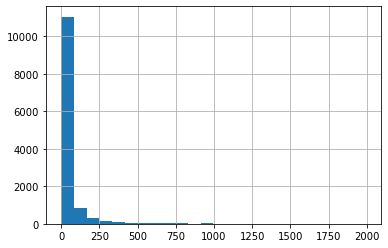

In [200]:
# plot duration column
adopted_df['duration_as_adoptable'].hist(bins=24)
plt.xlabel = 'Days Before Adoption'
plt.ylabel = 'Amount'
plt.show()

The length of time that a pet has been up for adoption seems low, even after deleting all of the rows where the duration == 0. 

It's important to note that these durations are only within the petfinder system; they do not reflect if an animal was added to the system the day of or several days after being admitted to the adoption facility. The datetimes are likely generated by the system, so they are whenever the facility uploads their animals and whenever they declare a pet to be adopted.

In [157]:
adopted_df.tail(5)[['id', 'published_at', 'status_changed_at']]

,id,published_at,status_changed_at
89995,17306397,2010-08-31 00:00:00+00:00,2010-09-04 20:56:59+00:00
89996,17306426,2010-08-31 00:00:00+00:00,2010-09-04 20:18:56+00:00
89997,17303331,2010-08-31 00:00:00+00:00,2010-09-12 23:17:53+00:00
89998,17302498,2010-08-31 00:00:00+00:00,2010-10-25 16:44:45+00:00
89999,17299328,2010-08-31 00:00:00+00:00,2010-09-28 23:43:57+00:00


In [203]:
adopted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12637 entries, 18 to 0
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   id                      12637 non-null  int64              
 1   organization_id         12637 non-null  object             
 2   url                     12637 non-null  object             
 3   type                    12637 non-null  object             
 4   species                 12637 non-null  object             
 5   breeds                  12637 non-null  object             
 6   colors                  12637 non-null  object             
 7   age                     12637 non-null  object             
 8   gender                  12637 non-null  object             
 9   size                    12637 non-null  object             
 10  coat                    8905 non-null   object             
 11  attributes              12637 non-null  obje

In [208]:
adopted_df.drop(columns='organization_animal_id', inplace=True)
adopted_df.shape

(12637, 26)

## Organizations

In [228]:
wa_organizations = pf.organizations(state='WA', results_per_page=100, pages=None, return_df=True)

/opt/anaconda3/lib/python3.8/site-packages/petpy-2.2.1-py3.8.egg/petpy/api.py:1049: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  results_df = json_normalize(results[key])


In [231]:
wa_organizations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      240 non-null    object
 1   name                    240 non-null    object
 2   email                   236 non-null    object
 3   phone                   156 non-null    object
 4   url                     240 non-null    object
 5   website                 131 non-null    object
 6   mission_statement       139 non-null    object
 7   photos                  240 non-null    object
 8   distance                0 non-null      object
 9   address.address1        103 non-null    object
 10  address.address2        16 non-null     object
 11  address.city            240 non-null    object
 12  address.state           240 non-null    object
 13  address.postcode        240 non-null    object
 14  address.country         240 non-null    object
 15  hours.

In [241]:
orgs_wa = wa_organizations[['id', 'address.city']].set_index('id')
orgs_wa.sample(10)

,address.city
id,
WA644,Seattle
WA608,Sequim
WA623,Kirkland
WA65,Yakima
WA114,Chehalis
WA391,Seattle
WA707,Olympia
WA704,Sammamish
WA690,Battle Ground


In [242]:
city_adopted = pd.DataFrame.to_dict(orgs_wa)

In [244]:
city_adopted = city_adopted['address.city']
print(city_adopted)

{'WA193': 'Yakima', 'WA638': 'Okanogan', 'WA58': 'Seattle', 'WA687': 'Yakima', 'WA447': 'Yakima', 'WA608': 'Sequim', 'WA461': 'Kirkland', 'WA39': 'Redmond', 'WA112': 'Tacoma', 'WA401': 'Des Moines', 'WA698': 'Richland', 'WA685': 'Port Orchard', 'WA703': 'Puyallup', 'WA19': 'Olympia', 'WA446': 'Olympia', 'WA674': 'Onalaska', 'WA08': 'Bremerton', 'WA319': 'Ellensburg', 'WA215': 'Seattle', 'WA254': 'Auburn', 'WA694': 'Gig Harbor', 'WA84': 'Snoqualmie', 'WA472': 'Lake Stevens', 'WA127': 'Puyallup', 'WA138': 'Bothell', 'WA615': 'West Richland', 'WA91': 'Leavenworth', 'WA135': 'Camano Island', 'WA668': 'Yakima', 'WA388': 'Chewelah', 'WA467': 'Chehalis', 'WA419': 'Issaquah', 'WA380': 'Roslyn', 'WA325': 'Bainbridge Island', 'WA287': 'Moses Lake', 'WA441': 'Seattle', 'WA430': 'Anacortes', 'WA602': 'Newport', 'WA527': 'Seattle', 'WA692': 'Graham', 'WA652': 'Renton', 'WA307': 'Issaquah', 'WA705': 'Bellevue', 'WA573': 'Lacey', 'WA503': 'Seattle', 'WA214': 'Seattle', 'WA673': 'Edmonds ', 'WA531': '

In [246]:
adopted_df['city'] = adopted_df['organization_id'].map(city_adopted)

In [247]:
adopted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12637 entries, 18 to 0
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   id                     12637 non-null  int64              
 1   organization_id        12637 non-null  object             
 2   url                    12637 non-null  object             
 3   type                   12637 non-null  object             
 4   species                12637 non-null  object             
 5   breeds                 12637 non-null  object             
 6   colors                 12637 non-null  object             
 7   age                    12637 non-null  object             
 8   gender                 12637 non-null  object             
 9   size                   12637 non-null  object             
 10  coat                   8905 non-null   object             
 11  attributes             12637 non-null  object            

In [248]:
adopted_df.sample(5)

,id,organization_id,url,type,species,breeds,colors,age,gender,size,...,primary_photo_cropped,videos,status,status_changed_at,published_at,distance,contact,_links,duration_as_adoptable,city
134,31159586,WA470,https://www.petfinder.com/dog/cinderella-31159...,Dog,Dog,"{'primary': 'Terrier', 'secondary': None, 'mix...","{'primary': 'Black', 'secondary': 'White / Cre...",Baby,Female,Medium,...,{'small': 'https://dl5zpyw5k3jeb.cloudfront.ne...,[],adopted,2015-01-14 21:44:05+00:00,2015-01-02 23:50:44+00:00,4.4792,"{'email': 'info@sunnyskysshelter.org', 'phone'...","{'self': {'href': '/v2/animals/31159586'}, 'ty...",11.912049,Puyallup
50,33796689,WA113,https://www.petfinder.com/cat/09166-dinah-3379...,Cat,Cat,"{'primary': 'Domestic Short Hair', 'secondary'...","{'primary': 'Tabby (Brown / Chocolate)', 'seco...",Adult,Female,Medium,...,{'small': 'https://dl5zpyw5k3jeb.cloudfront.ne...,[],adopted,2015-12-07 12:43:34+00:00,2015-11-16 11:13:25+00:00,3.7291,"{'email': 'sjobecuba@spokanecounty.org', 'phon...","{'self': {'href': '/v2/animals/33796689'}, 'ty...",21.062604,Spokane Valley
158,31848591,WA15,https://www.petfinder.com/dog/jack-31848591/wa...,Dog,Dog,"{'primary': 'Australian Shepherd', 'secondary'...","{'primary': 'White / Cream', 'secondary': 'Bla...",Young,Male,Medium,...,{'small': 'https://dl5zpyw5k3jeb.cloudfront.ne...,[],adopted,2015-04-16 20:14:23+00:00,2015-04-04 22:33:49+00:00,0.0610,{'email': 'alternativehumanesociety@gmail.com'...,"{'self': {'href': '/v2/animals/31848591'}, 'ty...",11.903171,Bellingham
44,33194164,OR246,https://www.petfinder.com/dog/lea-33194164/or/...,Dog,Dog,"{'primary': 'Maltese', 'secondary': None, 'mix...","{'primary': 'White / Cream', 'secondary': None...",Adult,Female,Small,...,{'small': 'https://dl5zpyw5k3jeb.cloudfront.ne...,[],adopted,2015-09-22 22:21:37+00:00,2015-09-04 00:23:16+00:00,9.8093,"{'email': 'rfpetfinderinquiries@gmail.com', 'p...","{'self': {'href': '/v2/animals/33194164'}, 'ty...",18.915521,NaN
331,32772298,WA132,https://www.petfinder.com/cat/darth-chicken-32...,Cat,Cat,"{'primary': 'Domestic Short Hair', 'secondary'...","{'primary': 'Black', 'secondary': 'White', 'te...",Baby,Male,Small,...,None,[],adopted,2015-07-20 23:37:41+00:00,2015-07-18 22:09:42+00:00,4.0267,"{'email': 'adopt@thenoahcenter.org', 'phone': ...","{'self': {'href': '/v2/animals/32772298'}, 'ty...",2.061100,Stanwood


In [249]:
city_adopted['WA470']

'Puyallup'

In [252]:
adopted_df.type.unique()

array(['Cat', 'Dog'], dtype=object)

In [253]:
adopted_df.species.unique()

array(['Cat', 'Dog'], dtype=object)

In [254]:
adopted_df.drop(columns='type', inplace=True)

In [255]:
adopted_df['organization_id'].unique()

array(['WA125', 'WA7', 'WA214', 'WA307', 'WA519', 'WA433', 'WA66',
       'WA101', 'WA07', 'WA538', 'WA581', 'WA56', 'WA38', 'WA132',
       'WA470', 'WA122', 'WA526', 'WA553', 'WA15', 'WA422', 'WA330',
       'WA119', 'WA476', 'WA285', 'WA353', 'WA606', 'WA162', 'WA573',
       'WA255', 'WA368', 'WA446', 'WA418', 'WA391', 'WA149', 'WA138',
       'WA605', 'WA444', 'WA500', 'WA621', 'WA49', 'WA135', 'WA325',
       'WA424', 'WA73', 'WA23', 'OR187', 'WA414', 'CA2002', 'WA575',
       'WA127', 'WA474', 'WA210', 'WA19', 'WA209', 'WA441', 'WA613',
       'WA584', 'WA169', 'WA580', 'WA461', 'WA77', 'WA419', 'WA615',
       'WA544', 'WA208', 'WA614', 'WA617', 'WA96', 'WA08', 'WA466',
       'WA577', 'WA503', 'WA112', 'WA447', 'WA156', 'WA523', 'WA378',
       'WA552', 'BC81', 'WA401', 'WA02', 'CA2261', 'WA388', 'WA51',
       'WA113', 'WA175', 'WA97', 'WA262', 'WA564', 'OR243', 'WA486',
       'WA467', 'WA68', 'WA203', 'WA472', 'WA123', 'WA241', 'WA215',
       'WA167', 'WA142', 'WA150', 'OR

In [256]:
non_wa = adopted_df[~adopted_df['organization_id'].str.contains('WA')]
non_wa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 31257314 to 34140226
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   organization_id        313 non-null    object             
 1   url                    313 non-null    object             
 2   species                313 non-null    object             
 3   breeds                 313 non-null    object             
 4   colors                 313 non-null    object             
 5   age                    313 non-null    object             
 6   gender                 313 non-null    object             
 7   size                   313 non-null    object             
 8   coat                   206 non-null    object             
 9   attributes             313 non-null    object             
 10  environment            313 non-null    object             
 11  tags                   313 non-null    object 

In [259]:
adopted_df[adopted_df['city'].isna()]['organization_id']

id
31257314     OR187
31263620    CA2002
31268962    CA2002
31277619    CA2002
31310223    CA2002
             ...  
34131722    TX1910
34131724     WA613
34131729     WA613
34131741     WA613
34140226     OR123
Name: organization_id, Length: 406, dtype: object

In [260]:
city_adopted['WA613']

KeyError: 'WA613'

In [265]:
adopted_df.dropna(subset=['city'], inplace=True)

In [266]:
adopted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12231 entries, 31150655 to 34140497
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   organization_id        12231 non-null  object             
 1   url                    12231 non-null  object             
 2   species                12231 non-null  object             
 3   breeds                 12231 non-null  object             
 4   colors                 12231 non-null  object             
 5   age                    12231 non-null  object             
 6   gender                 12231 non-null  object             
 7   size                   12231 non-null  object             
 8   coat                   8608 non-null   object             
 9   attributes             12231 non-null  object             
 10  environment            12231 non-null  object             
 11  tags                   12231 non-null  objec

In [269]:
adopted_df['hasimage'] = np.where(adopted_df['photos']!= '[]', True, False)

In [270]:
adopted_df['hasvideo'] = np.where(adopted_df['videos']!= '[]', True, False)

In [271]:
adopted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12231 entries, 31150655 to 34140497
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   organization_id        12231 non-null  object             
 1   url                    12231 non-null  object             
 2   species                12231 non-null  object             
 3   breeds                 12231 non-null  object             
 4   colors                 12231 non-null  object             
 5   age                    12231 non-null  object             
 6   gender                 12231 non-null  object             
 7   size                   12231 non-null  object             
 8   coat                   8608 non-null   object             
 9   attributes             12231 non-null  object             
 10  environment            12231 non-null  object             
 11  tags                   12231 non-null  objec

In [272]:
adopted_df.drop(columns='primary_photo_cropped', inplace=True)

In [273]:
adopted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12231 entries, 31150655 to 34140497
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   organization_id        12231 non-null  object             
 1   url                    12231 non-null  object             
 2   species                12231 non-null  object             
 3   breeds                 12231 non-null  object             
 4   colors                 12231 non-null  object             
 5   age                    12231 non-null  object             
 6   gender                 12231 non-null  object             
 7   size                   12231 non-null  object             
 8   coat                   8608 non-null   object             
 9   attributes             12231 non-null  object             
 10  environment            12231 non-null  object             
 11  tags                   12231 non-null  objec

In [277]:
adopted_df.sample(5)['_links']

id
33862946    {'self': {'href': '/v2/animals/33862946'}, 'type': {'href': '/v2/types/cat'}, 'organization': {'href': '/v2/organizations/wa132'}}
33947537    {'self': {'href': '/v2/animals/33947537'}, 'type': {'href': '/v2/types/dog'}, 'organization': {'href': '/v2/organizations/wa214'}}
31577450    {'self': {'href': '/v2/animals/31577450'}, 'type': {'href': '/v2/types/cat'}, 'organization': {'href': '/v2/organizations/wa125'}}
33947322    {'self': {'href': '/v2/animals/33947322'}, 'type': {'href': '/v2/types/cat'}, 'organization': {'href': '/v2/organizations/wa132'}}
33480753    {'self': {'href': '/v2/animals/33480753'}, 'type': {'href': '/v2/types/cat'}, 'organization': {'href': '/v2/organizations/wa446'}}
Name: _links, dtype: object

In [278]:
adopted_df.drop(columns='_links', inplace=True)

In [279]:
# save the data to a new csv file
datapath = 'data'
save_file(adopted_df, 'adopted_df_cleaned.csv', datapath)

Writing file.  "data/adopted_df_cleaned.csv"
